## Identifying Duplicate Questions

Over 100 million people visit Quora every month, so it's no surprise that many people ask similar (or the same) questions. Various questions with the same intent can cause people to spend extra time searching for the best answer to their question, and results in members answering multiple versions of the same question. Quora uses random forest to identify duplicated questions to provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
Follow the steps outlined below to build the appropriate classifier model. 


Steps:
- Download data
- Exploration
- Cleaning
- Feature Engineering
- Modeling

By the end of this project you should have **a presentation that describes the model you built** and its **performance**. 


In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv("/Users/Oswal/Documents/GitHub/mini-project-V/train 2.csv")

In [3]:
df = pd.read_csv("/Users/Oswal/Documents/GitHub/mini-project-V/train 2.csv")
df = df.dropna()  # Remove rows with missing values
X = df['question1']
y = df['question2']


In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.shape

(404287, 6)

In [6]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [7]:
df.dtypes

id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object

#### Note
There is no designated test.csv file. The train.csv file is the entire dataset. Part of the data in the train.csv file should be set aside to act as the final testing data.

In [8]:
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X = df['question1']
y = df['question2']


X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size= 0.2)

### Exploration

In [9]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [10]:

df.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404287 non-null  int64 
 1   qid1          404287 non-null  int64 
 2   qid2          404287 non-null  int64 
 3   question1     404287 non-null  object
 4   question2     404287 non-null  object
 5   is_duplicate  404287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [12]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404287.000000,404287.000000,404287.000000,404287.000000
mean,202144.340337,217243.151093,220955.212082,0.369201
std,116708.673691,157751.614317,159903.168488,0.482589
min,0.000000,1.000000,2.000000,0.000000
25%,101071.500000,74436.500000,74726.500000,0.000000
50%,202145.000000,192181.000000,197053.000000,0.000000
75%,303216.500000,346573.000000,354692.000000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [13]:
X.info()

<class 'pandas.core.series.Series'>
Int64Index: 404287 entries, 0 to 404289
Series name: question1
Non-Null Count   Dtype 
--------------   ----- 
404287 non-null  object
dtypes: object(1)
memory usage: 6.2+ MB


In [14]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 404287 entries, 0 to 404289
Series name: question2
Non-Null Count   Dtype 
--------------   ----- 
404287 non-null  object
dtypes: object(1)
memory usage: 6.2+ MB


### Cleaning

- Tokenization
- Stopwords cleaning
- Removing punctuation
- Normalizing
- Stemming

In [15]:
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [16]:
df.fillna(0, inplace= True)

In [17]:
df['question1'] = df['question1'].astype('str')
df['question2'] = df['question2'].astype('str')

In [18]:
# handle text data
df['question1'] = df['question1'].str.lower()
df['question1'] = df['question1'].str.replace('[^\w\s]', '')

# handle text data
df['question2'] = df['question2'].str.lower()
df['question2'] = df['question2'].str.replace('[^\w\s]', '')

/var/folders/m7/gmztn8ls7hvb7z45rrh281mh0000gn/T/ipykernel_48807/4267550441.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['question1'] = df['question1'].str.replace('[^\w\s]', '')
/var/folders/m7/gmztn8ls7hvb7z45rrh281mh0000gn/T/ipykernel_48807/4267550441.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['question2'] = df['question2'].str.replace('[^\w\s]', '')


In [19]:
# Tokenization 

X = X.apply(lambda x: word_tokenize(x))
y = y.apply(lambda x: word_tokenize(x))

In [20]:
# Stopwords cleaning

stop_words = set(stopwords.words('english'))
X = X.apply(lambda x: [word for word in x if word not in stop_words])
y = y.apply(lambda x: [word for word in x if word not in stop_words])

In [21]:
# Removing punctuation

X = X.apply(lambda x: [word for word in x if word.isalpha()])
y = y.apply(lambda x: [word for word in x if word.isalpha()])

In [22]:
# Stemming
stemmer = PorterStemmer()
X = X.apply(lambda x: [stemmer.stem(word) for word in x])
y = y.apply(lambda x: [stemmer.stem(word) for word in x])

In [23]:
X.head()

0    [what, step, step, guid, invest, share, market...
1                     [what, stori, kohinoor, diamond]
2    [how, i, increas, speed, internet, connect, us...
3                 [whi, i, mental, lone, how, i, solv]
4    [which, one, dissolv, water, quikli, sugar, sa...
Name: question1, dtype: object

### Feature Engineering

- tf-idf
- word2vec
- word count
- number of the same words in both questions
- ....

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

In [25]:
# TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform([' '.join(x) for x in X])
y_tfidf = tfidf.transform([' '.join(y) for y in y])

In [26]:
# Word2Vec
model = Word2Vec(X, window=5, min_count=1, workers=4)
X_word2vec = [model.wv[word] for words in X for word in words]
# y_word2vec = [model.wv[word] for words in y for word in words]


In [27]:
y_word2vec = []
for words in y:
    vec = []
    for word in words:
        try:
            vec.append(model.wv[word])
        except KeyError:
            continue
    y_word2vec.append(vec)

In [28]:
# create a feature for the number of unique words
df['unique_word_count1'] = df['question1'].apply(lambda x: len(set(x.split())))
df['unique_word_count2'] = df['question2'].apply(lambda x: len(set(x.split())))

In [29]:
# create a feature for word count1
X_word_count = df['question1'].apply(lambda x: len(x.split()))


# create a feature for word count2
y_word_count= df['question2'].apply(lambda x: len(x.split()))

In [30]:
# number of the same words in both questions
X_y_common_words = [len(set(x).intersection(y)) for x, y in zip(X, y)]

In [31]:
# X_some = np.hstack([X_tfidf.toarray(), X_word2vec])

In [32]:
# Combine all features
# X_some = np.hstack([X_tfidf.toarray(), X_word2vec, X_word_count.reshape(-1, 1), y_word_count.reshape(-1, 1), X_y_common_words.reshape(-1, 1)])



In [33]:
# X_all = np.hstack(X_some,[y_word_count.reshape(-1, 1), X_y_common_words.reshape(-1, 1)])

In [34]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,unique_word_count1,unique_word_count2
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,12,11
1,1,3,4,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0,7,11
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,14,10
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...,0,10,9
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,13,7


### Modeling

Different modeling techniques can be used:

- logistic regression
- XGBoost
- LSTMs
- etc

In [35]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

In [39]:
# XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X, y)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [     0      1      2 ... 289887 289888 289889], got [list([])
 list(['a', 'asteroid', 'project', 'hit', 'earth', 'year', 'how', 'would', 'human', 'surviv'])
 list(['a', 'b', 'complet', 'job', 'day', 'respect', 'they', 'start', 'work', 'togeth', 'b', 'leav', 'day', 'work', 'finish', 'in', 'mani', 'day', 'total', 'work', 'finish'])
 ...
 list(['एक', 'sweet', 'एक', 'medecin', 'एक', 'film', 'एक', 'एक', 'citi', 'एक', 'car', 'एक', 'जगह', 'एक', 'doggi', 'इन', 'it', 'challeng'])
 list(['潘迪華', 'i', 'your', 'guitar', 'chord'])
 list(['译文', 'glass', 'fiber', 'reinforc', 'resin', 'matrix', 'composit'])]

In [40]:
max_len = 50
max_features = 5000

In [41]:
# LSTMs
# Tokenize and pad the input sequences
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X) + list(y))
X_sequence = tokenizer.texts_to_sequences(X)
y_sequence = tokenizer.texts_to_sequences(y)
X_padded = pad_sequences(X_sequence, maxlen=max_len)
y_padded = pad_sequences(y_sequence, maxlen=max_len)


In [42]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-01-31 15:52:50.456073: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-31 15:52:50.457744: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [45]:
# Train the model
model.fit(X_padded, df['is_duplicate'], epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10


2023-01-31 15:53:25.941830: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-31 15:53:27.362828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-31 15:53:27.976320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-31 15:53:28.910459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-31 15:53:29.264020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-31 15:53:29.946613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2843/2843 [==============================] - ETA: 0s - loss: 0.5465 - accuracy: 0.7237

2023-01-31 15:56:47.630898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-31 15:56:47.762578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-31 15:56:47.883036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2843/2843 [==============================] - 208s 72ms/step - loss: 0.5465 - accuracy: 0.7237 - val_loss: 0.5202 - val_accuracy: 0.7453
Epoch 2/10
2843/2843 [==============================] - 188s 66ms/step - loss: 0.5117 - accuracy: 0.7466 - val_loss: 0.5072 - val_accuracy: 0.7552
Epoch 3/10
2843/2843 [==============================] - 194s 68ms/step - loss: 0.4900 - accuracy: 0.7612 - val_loss: 0.5041 - val_accuracy: 0.7557
Epoch 4/10
2843/2843 [==============================] - 189s 67ms/step - loss: 0.4687 - accuracy: 0.7752 - val_loss: 0.4994 - val_accuracy: 0.7626
Epoch 5/10
2843/2843 [==============================] - 189s 66ms/step - loss: 0.4455 - accuracy: 0.7900 - val_loss: 0.5031 - val_accuracy: 0.7644
Epoch 6/10
2843/2843 [==============================] - 188s 66ms/step - loss: 0.4219 - accuracy: 0.8029 - val_loss: 0.5078 - val_accuracy: 0.7653
Epoch 7/10
2843/2843 [==============================] - 188s 66ms/step - loss: 0.3975 - accuracy: 0.8169 - val_loss: 0.5316 - val

In [47]:
history = model.fit(X_padded, df['is_duplicate'], epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
2843/2843 [==============================] - 186s 65ms/step - loss: 0.3081 - accuracy: 0.8608 - val_loss: 0.6169 - val_accuracy: 0.7620
Epoch 2/10
2843/2843 [==============================] - 184s 65ms/step - loss: 0.2892 - accuracy: 0.8689 - val_loss: 0.6738 - val_accuracy: 0.7558
Epoch 3/10
2843/2843 [==============================] - 182s 64ms/step - loss: 0.2723 - accuracy: 0.8770 - val_loss: 0.6774 - val_accuracy: 0.7607
Epoch 4/10
2843/2843 [==============================] - 182s 64ms/step - loss: 0.2571 - accuracy: 0.8844 - val_loss: 0.7280 - val_accuracy: 0.7579
Epoch 5/10
2843/2843 [==============================] - 192s 68ms/step - loss: 0.2440 - accuracy: 0.8899 - val_loss: 0.7641 - val_accuracy: 0.7633
Epoch 6/10
2843/2843 [==============================] - 188s 66ms/step - loss: 0.2323 - accuracy: 0.8961 - val_loss: 0.7825 - val_accuracy: 0.7594
Epoch 7/10
2843/2843 [==============================] - 180s 63ms/step - loss: 0.2218 - accuracy: 0.9011 - val_loss: 0

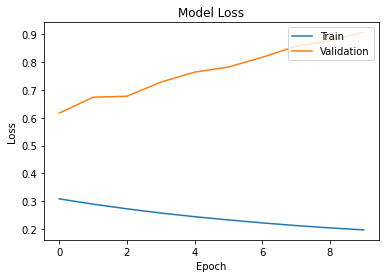

In [49]:
import matplotlib.pyplot as plt

# Plot the training and validation loss over each epoch
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the validation set
y_pred = model.predict(X_padded)

# Convert the predictions to binary labels (0 or 1)
y_pred = (y_pred > 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_padded, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

2023-01-31 17:08:20.290475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-31 17:08:20.937747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-01-31 17:08:21.542981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12634/12634 [==============================] - 217s 17ms/step


ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets